In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk

In [2]:
# get data
!ls pizza_steak

test  train


In [5]:
!ls pizza_steak/train/steak

1000205.jpg 1647351.jpg 2238681.jpg 2824680.jpg 3375959.jpg 417368.jpg
100135.jpg  1650002.jpg 2238802.jpg 2825100.jpg 3381560.jpg 4176.jpg
101312.jpg  165639.jpg  2254705.jpg 2826987.jpg 3382936.jpg 42125.jpg
1021458.jpg 1658186.jpg 225990.jpg  2832499.jpg 3386119.jpg 421476.jpg
1032846.jpg 1658443.jpg 2260231.jpg 2832960.jpg 3388717.jpg 421561.jpg
10380.jpg   165964.jpg  2268692.jpg 285045.jpg  3389138.jpg 438871.jpg
1049459.jpg 167069.jpg  2271133.jpg 285147.jpg  3393547.jpg 43924.jpg
1053665.jpg 1675632.jpg 227576.jpg  2855315.jpg 3393688.jpg 440188.jpg
1068516.jpg 1678108.jpg 2283057.jpg 2856066.jpg 3396589.jpg 442757.jpg
1068975.jpg 168006.jpg  2286639.jpg 2859933.jpg 339891.jpg  443210.jpg
1081258.jpg 1682496.jpg 2287136.jpg 286219.jpg  3417789.jpg 444064.jpg
1090122.jpg 1684438.jpg 2291292.jpg 2862562.jpg 3425047.jpg 444709.jpg
1093966.jpg 168775.jpg  229323.jpg  2865730.jpg 3434983.jpg 447557.jpg
1098844.jpg 1697339.jpg 2300534.jpg 2878151.jpg 3435358.jpg 461187.jpg
1100074.jp

In [8]:
import os
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/steak
There are 0 directories and 250 images in pizza_steak/test/pizza
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/steak
There are 0 directories and 750 images in pizza_steak/train/pizza


In [10]:
print(len(os.listdir("pizza_steak/train/steak")))


750


In [11]:
# get classnames
import pathlib
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted(item.name for item in data_dir.glob("*")))
class_names

array(['pizza', 'steak'], dtype='<U5')

In [12]:
#visualize the images
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    # directory with image
    target_folder = target_dir + target_class

    # get random image from target folder
    random_image = random.sample(os.listdir(target_folder), 1)

    # load and visual random image
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    print(f"Image shape {img.shape}")

Image shape (384, 512, 3)


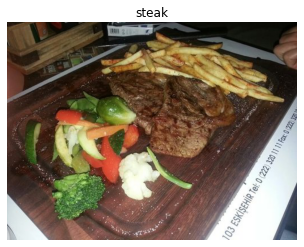

In [15]:
view_random_image(target_dir= "./pizza_steak/train/", target_class= "steak")

In [27]:
# load and normalize images (preprocessing)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.random.set_seed(42)

# scaling data to range 0-1
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# set path for data directories
train_dir = "/Users/korzeniewski/Desktop/tensor-course/pizza_steak/train"
test_dir = "/Users/korzeniewski/Desktop/tensor-course/pizza_steak/test"

# Import data and turn into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                                batch_size = 32, # size of mini batches
                                                target_size=(224, 224), # size of output image
                                                class_mode = "binary", # type of data
                                                seed = 42)

valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                                batch_size = 32,
                                                target_size=(224, 224),
                                                class_mode = "binary",
                                                seed = 42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [35]:
images, labels = train_data.next() #get next batch of image
len(images), len(labels) 
# len(train_data) #47 number of baches

(32, 32)

In [40]:
# show to first images and shape of image 2
images[2], images[2].shape, labels[2]

(array([[[0.        , 0.03137255, 0.01960784],
         [0.        , 0.02745098, 0.01568628],
         [0.        , 0.02745098, 0.01568628],
         ...,
         [0.00392157, 0.02745098, 0.01176471],
         [0.00392157, 0.02745098, 0.01176471],
         [0.00392157, 0.03921569, 0.01960784]],
 
        [[0.00784314, 0.02745098, 0.00392157],
         [0.01176471, 0.03137255, 0.00784314],
         [0.01176471, 0.03137255, 0.00784314],
         ...,
         [0.00784314, 0.04705883, 0.04313726],
         [0.        , 0.03921569, 0.03529412],
         [0.        , 0.03529412, 0.03137255]],
 
        [[0.02352941, 0.03137255, 0.        ],
         [0.02745098, 0.03529412, 0.        ],
         [0.02745098, 0.03137255, 0.        ],
         ...,
         [0.1764706 , 0.23529413, 0.24705884],
         [0.16470589, 0.22352943, 0.23529413],
         [0.14509805, 0.21568629, 0.22352943]],
 
        ...,
 
        [[0.25490198, 0.3137255 , 0.3019608 ],
         [0.2509804 , 0.30588236, 0.30588

In [28]:
# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, # higher more complex model
                         strides = 1, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # output will be compares; padding can also be 'same' (input same as output)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data, #Image data generator crate sample with labels
                        epochs=5,
                        steps_per_epoch=len(train_data), # train_data/batches = 47
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 97s 2s/step - loss: 0.5325 - accuracy: 0.7233 - val_loss: 0.3878 - val_accuracy: 0.8360
Epoch 2/5
47/47 [==============================] - 118s 3s/step - loss: 0.4475 - accuracy: 0.7927 - val_loss: 0.3666 - val_accuracy: 0.8480
Epoch 3/5
47/47 [==============================] - 105s 2s/step - loss: 0.4055 - accuracy: 0.8253 - val_loss: 0.3258 - val_accuracy: 0.8680
Epoch 4/5
47/47 [==============================] - 105s 2s/step - loss: 0.3586 - accuracy: 0.8500 - val_loss: 0.3850 - val_accuracy: 0.8360
Epoch 5/5
47/47 [==============================] - 103s 2s/step - loss: 0.3617 - accuracy: 0.8500 - val_loss: 0.3193 - val_accuracy: 0.8700


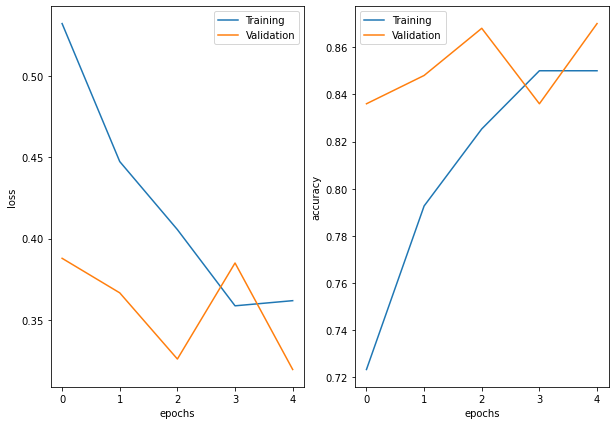

In [48]:
# evaluate model
pd.DataFrame(history_1.history)
loss = history_1.history["loss"]
val_loss = history_1.history["val_loss"]
acc = history_1.history["accuracy"]
val_acc = history_1.history["val_accuracy"]

epochs = range(len(val_acc))

plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(["Training", "Validation"])

plt.subplot(1,2,2)
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(["Training", "Validation"])


Augmented training images:
Found 500 images belonging to 2 classes.


(-0.5, 223.5, 223.5, -0.5)

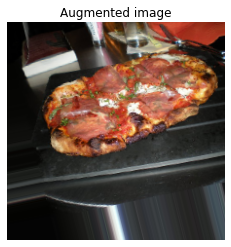

In [55]:
#To reduce overfiting you can use data augmentation during loading data in mens add zoom, rotation.  
# Import data and augment it from training directory - make some noise
print("Augmented training images:")
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

train_data_augmented = train_datagen_augmented.flow_from_directory(test_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary')
random_number = random.randint(0, 32) # we're making batches of size 32, so we'll get a random instance
augmented_images, augmented_labels = train_data_augmented.next()
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False)

In [29]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_7 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

In [31]:
# non-CNN model

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224,224,3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_2.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data, #Image data generator crate sample with labels
                        epochs=5,
                        steps_per_epoch=len(train_data), # train_data/batches = 47
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 21s 425ms/step - loss: 2.3357 - accuracy: 0.6413 - val_loss: 1.3495 - val_accuracy: 0.5540
Epoch 2/5
47/47 [==============================] - 19s 404ms/step - loss: 1.0069 - accuracy: 0.6693 - val_loss: 0.5301 - val_accuracy: 0.7820
Epoch 3/5
47/47 [==============================] - 19s 404ms/step - loss: 0.6380 - accuracy: 0.7313 - val_loss: 0.6438 - val_accuracy: 0.7040
Epoch 4/5
47/47 [==============================] - 19s 407ms/step - loss: 0.5960 - accuracy: 0.7493 - val_loss: 0.4403 - val_accuracy: 0.7960
Epoch 5/5
47/47 [==============================] - 19s 407ms/step - loss: 0.5451 - accuracy: 0.7633 - val_loss: 0.4222 - val_accuracy: 0.8120


In [32]:
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 150528)            0         
                                                                 
 dense_5 (Dense)             (None, 100)               15052900  
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 100)               10100     
                                                                 
 dense_8 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


# Check model on own photo

In [93]:
def load_and_prep_image(path, img_shape=224):
    img = mpimg.imread(path)
    img = tf.constant(img)
    img = tf.image.resize(img, size= [img_shape, img_shape])
    img = img/255
    return img

img=load_and_prep_image(path = '/Users/korzeniewski/Downloads/pizza-rodzinna.jpg')
img.shape

TensorShape([224, 224, 3])

In [77]:
class_names

array(['pizza', 'steak'], dtype='<U5')

Text(0.5, 1.0, 'Prediction is: pizza')

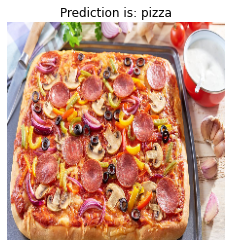

In [94]:
pred = model_1.predict(tf.expand_dims(img, axis = 0))
plt.imshow(img)
plt.axis(False)
plt.title("Prediction is: " + class_names[int(pred.round())])